# Eagar-Tsai model
### Created by: Pannos
Thesis: Numerical Framework for Selective Laser Melting Processing of Thermoelectric Materials
Year: 2020


## My Notes

For the Rosenthal solution all the power is concentrated on a singular point and thus it is reasonable that the temperature close to that point is extremely high. The analytical solution returns an infinite value at the centerline point (0,0,0). This also has an effect on the shape of the isotherm contours, as they are of constant shape, semi-circular at the transverse YZ plane. 

On the other side, the Eagar-Tsai model distributes the power with a Gaussian heat source. This way the maximum temperature is lower at the centerline of the beam, compared to Rosenthal’s solutions, and the shapes of the isotherms are not constant.

For the case of certain materials, calculations using the experimental processing parameters values for SLM yield high surface temperature values, **sometimes higher than the boiling temperature**.  These high temperature values at the top surface can be attributed to assumptions made for derivation of the model. Neglected thermal energy losses such as natural heat convection and Marangoni convection from the melt pool, heat radiation to the surroundings, absence of latent heat of fusion and evaporation contribute to a higher surface temperature. In addition, the ET model assumes that the absorbed energy is entirely deposited on the top surface and then conducted to deeper layers. In SLM, the powder bed is porous and the absorbed energy penetrates the top surface, due to porosity and reaches deeper layers, where it interacts with the solid matter. Thus, a three-dimensional energy source would be a more accurate modeling choice compared to the two-dimensional ET model and would yield a lower maximum surface temperature and higher melt depths. However, it would be difficult to determine the heat source distribution formula for SLM, as it would depend on the porosity of the powder bed.

##  Motivation and Background
The purpose of the Eagar-Tsai (ET) model is to provide information about the weld pool shape and size for a travelling Gaussian distributed heat source on a semi-infinite plate. This heat transfer model offers a physically accurate, quantitative relationship between the process, material parameters and the resulting temperature field, thus the weld size and shape. The temperature field prediction allows for a better understanding of the process physical mechanisms and  can be utilized for process control, optimization, design of experiments, microstructure and residual stresses prediction.

In their paper, Eagar and Tsai compare predicted weld pool shapes with experimental weld pool shape measurements for laser welding. 


## Rosenthal solution
A simpler solution, derived by Rosenthal, predicts the temperature field produced by a steady state point heat source moving on the surface of a semi-infinite plate:

\begin{align*}
\large
T - T_{o} = \frac{q}{2 \pi k R} \exp{ \bigg({-\frac{v ( w + R )}{2a}} \bigg)}
\end{align*}

$T$: Temperature  
$T_{0}$ : Initial temperature  
$q$ : Power  
$k$ : Material thermal conductivity  
$R$ : Distance to the center of the source  
$v$ : Travel speed  
$w$ : Distance in travelling direction in a moving coordinate of speed $v$  
$a$ : Material thermal diffussivity  

### In dimensionless form: 

\begin{align*}
\large
\theta = n \frac{e^{-(\xi + R^{*})}}{R^{*}}
\end{align*}

\begin{align*}
\large
\theta = \frac{T-T_{o}}{T_{c}-T_{o}}, \
n = \frac{qv}{4 \pi a^2 \rho c (T_{c}-T_{o})}, \
\xi = \frac{vw}{2a}, R^{*} = (\xi^{2} + \psi^{2} + \zeta^{2})^{1/2}
\end{align*}

$R^{*}$: Dimensionless distance from the center of the arc

Rosenthal's model fails to provide weld pool shape information, as it predicts all transverse isotherms to have semicircular shapes. In addition, it fails to predict the temperature as $R \rightarrow 0$.  
For the model derivation, the following assumptions were made:  
1) Absence of convective and radiative heat flow in weld pool  
2) No latent heat of phase change  
3) Constant average thermal properties  
4) Quasi-steady state semi-infinite medium 

## Eagar-Tsai solution
With Rosenthal's solution as a basis but using a *travelling*, *distributed* heat source, Eagar and Tsai derived a solution that can predict the weld pool shape and size. Assumming a Gaussian distributed heat source function of the form 

\begin{align*}
\large
Q (x,y) = \frac{q}{2\pi\sigma^{2}}\exp{ \bigg(-\frac{x^2 + y^2}{2\sigma^2}\bigg)}
\end{align*}

where, $\sigma$ is the half-width of the arc.

Eventually, the solution for a Gaussian distributed heat source moving on a semi-infinite plate with no change in phase :

\begin{align*}
\large
T - T_{o} =  \int_0^t dt'' \frac{q}{\pi \rho c (4 \pi a )^{1/2}}\frac{t'' ^{-1/2}}{2at'' + \sigma^{2}} exp{ \bigg({- \frac{ w^{2} + y^{2} + 2 wvt'' + v^2 t''^{2} } {4at'' + 2\sigma^{2}} - \frac{z^{2}}{4at''}}\bigg)}
\end{align*}

$y$: Distance in the width dimension   
$z$: Distance in the depth dimension

### In dimensionless form:  

\begin{align*}
\large
\theta = \frac{n}{ \sqrt {2 \pi}} \int_0^\frac{v^{2} t }{2 a} d \tau \frac{\tau ^{-1/2}}{\tau + u^{2}} \exp { \bigg({- \frac{ \xi^{2} + \psi^{2} + 2 \xi \tau + \tau^{2} } {2\tau + 2u^{2}} - \frac{\zeta^{2}}{2\tau}}\bigg)} 
\end{align*}

\begin{align*}
\large
\xi = \frac{vw}{2a}, \
\psi = \frac{vy}{2a}, \
\zeta = \frac{vz}{2a}, \
\tau = \frac{v^2t''}{2a},\ 
\end{align*}

\begin{align*}
\large
\theta = \frac{T-T_{o}}{T_{c}-T_{o}}, \
u = \frac{ v \sigma  }{2a}, \
n = \frac{qv}{4 \pi a^2 \rho c (T_{c}-T_{o})} \\ 
\end{align*}

$T_{c}$ : Critical temperature ( e.g. material melting temperature)

The distribution ($u$) and operating parameter ($n$) are the two primary parameters of the solution. For $ u \rightarrow 0$ (zero beam width) the solution reduces to Rosenthal's.


# ET model functions

In [10]:
import numpy
from matplotlib import pyplot, cm
%matplotlib inline
from scipy.integrate import quad,quadrature,fixed_quad
import pandas
import numba
from numba import jit
import SiGe_parameters1 as sige

@jit
def integrand(tau,xi,psi,zi,u):
    '''
    Function that returns the integrand of dimensionless temperature distribution to be numerically integrated
    > tau: Integration variable
    > xi, psi, zi: Dimensionless height, width, depth as in Eagar-Tsai paper
    > u: Distribution parameter, ( travel speed * distribution parameter- radius ) / ( 2 * thermal diffusivity)
    '''
    return ((tau**(-0.5))/(tau+(u**2)))*numpy.exp(-((((xi+tau)**2)+(psi**2))/((2*tau)+(2*(u**2))))-((zi**2)/(2*tau)))

def Tfield ( w, y, z, mater, power, speed, radius = 25e-6, Tambient = 300, t = 1e-3):
    '''
    Function that returns the XY temperature field array on the top surface of processing and the XZ field array
    at y=0. In addition, the function returns the arrays with the errors from the numerical integration.
    > w, y, z: Dimensional height, width and depth arrays in meters
    > mater: Array with material properties
    > power: Nominal laser power in Watts
    > speed: Laser scanning speed in m/s
    > radius: Laser radius in meters
    > Tambient: Ambient temperature in Kelvin
    > t: Final time in seconds
    '''
    xi, psi, zi = ( speed * w ) / ( 2 * mater[3] ), ( speed * y ) / ( 2 * mater[3]), ( speed * z ) / ( 2 * mater[3] )
    u_par = ( speed * radius ) / ( 2 * mater[3] ) # Distribution parameter
    n_par = (  power * speed ) / ( 4 * numpy.pi * mater[2] * mater[1] * ( mater[3] ** 2 ) ) # Operating parameter
    tau = ( ( speed ** 2 ) * t ) / ( 2 * mater[3] )
    resXY, errorXY = numpy.empty (shape=(len(y),len(w))), numpy.empty(shape=(len(y),len(w)))
    resXZ, errorXZ = numpy.empty( shape = ( len(z), len(w) ) ), numpy.empty(shape = ( len(z), len(w) ) )
    for i, yvalue in enumerate (psi) :
        for j, xvalue in enumerate (xi) :
            resXY [ i, j ] , errorXY [ i , j ] = quad ( integrand, 0, tau, args = ( xvalue, yvalue, 0, u_par ), epsabs=1e-10, epsrel=1e-10)
    for i, zvalue in enumerate ( zi ) :
        for j, xvalue in enumerate (xi):
            resXZ [ i, j ], errorXZ [ i, j ] = quad ( integrand, 0, tau, args = (xvalue, 0, zvalue, u_par), epsabs=1e-12, epsrel=1e-12 )
    TXY = resXY / numpy.sqrt ( 2 *numpy.pi ) ; TXZ = resXZ / numpy.sqrt ( 2 *numpy.pi )
    # Multiply by operating parameter and add ambient temperature
    Tfield_XY = ( TXY * mater[5] * n_par ) + Tambient ; Tfield_XZ = ( TXZ * mater[5] * n_par ) + Tambient 
    return Tfield_XY, Tfield_XZ, errorXY, errorXZ

def meltdim( TXY, TXZ, w, y, z, Tmelt,  tol = 1.0 ):
    '''
    Function that returns the melt pool boundary coordinates given the temperature field arrays,
    melting temperature and a tolerance
    > TXY: Temperature field array on top surface, in Kelvin
    > TXZ: Temperature field array at y = 0, in Kelvin
    > w, y, z: Dimensional height, width and depth arrays in meters
    > Tmelt: Melting temperature in Kelvin
    > tol: Tolerance
    '''
    XZpos = numpy.where((TXZ >= (Tmelt - tol)) & (TXZ <= (Tmelt + tol)))
    max_depth = abs (numpy.min(z[XZpos[0]]) / 1e-6)
    XYpos = numpy.where (( TXY >= Tmelt - tol ) & (TXY <= Tmelt + tol))
    max_width = numpy.max (y[XYpos[0]]) / 1e-6
    max_length = numpy.max(w[XYpos[1]]) / 1e-6
    melt_dimensions = numpy.array([max_length, max_width, max_depth])
    melt_dimensions = numpy.around(melt_dimensions,1)
    return melt_dimensions

# SLM process simulations with the Eagar-Tsai model

The E-T model has been used for studies on the SLM process, since it simulates a travelling heat source on a plate, similar to the laser heat source that scans the surface of the powder material during the SLM process. The model can provide the temperature field during processing without the need for long-lasting simulations, which is usually the case for FEA computations, especially in time-dependent, three dimension simulations. 

Efficient design of experiments for processing parameter selection can be achieved by the large parameter space that can be studied with a simplified model, as Eagar-Tsai. 

The absorptivity of the material is taken into account to compute the net amount of power that heats the material. 

Both bulk and effective powder thermophysical material properties can be selected for computations.

In [11]:
def Cp (T) :
    '''
    > T : Temperature in degrees Celsius
    Specific heat capacity for Bi2Te3 below 500 C calculated in cal/deg*C
    and converted and returned in J/kgK
    Ref: Bolling, G. F. "Erratum: Addendum to Some Thermal Data for Bi2Te3." 
    The Journal of Chemical Physics 36.4 (1962): 1085-1086.
    '''
    Cp = (3 * (10**-2) ) + (2 * (10 ** -5) ) * T # Result in cal/deg*g
    Cp = Cp * 4186.8 #Convert to J/kgK
    return Cp

def ME_powder ( prop_solid, prop_fluid ,phi ) :
    '''
    Maxwell-Eucken model - Calculates effective powder bed properties as a function of porosity and respective properties
    Results questionable close to 50% porosity
    > prop_solid: Solid phase property
    > prop_fluid : Fluid phase property
    > phi : Porosity 
    Xue, Samuel S., and Joel W. Barlow. "Models for the Prediction of the Thermal."
    1991 International Solid Freeform Fabrication Symposium. 1991.
    '''
    if phi <= 0.5:
        apar = (3 * prop_solid) / ( (2 * prop_solid) + prop_fluid)
        num = prop_solid * ( 1 - ( (1 - ((apar * prop_fluid) / prop_solid ) ) * phi) )
        den = 1 + ( ( apar - 1 ) * phi)
        ME_powder = num / den
        
    elif phi > 0.5 : 
        apar = (3 * prop_fluid ) / ( (2 * prop_fluid) + prop_solid )
        num = prop_fluid * (1 - (1 - (apar * prop_solid / prop_fluid)) * (1 - phi) )
        den = 1 + ( (apar - 1) * (1 - phi) )
        ME_powder = num / den
    
    return ME_powder

def Sih_Barlow ( prop_solid, prop_fluid, phi, k_radiation, contact):
    '''
    For no contact between particles, contact = 0 
    for complete particle contact, contact = 1
    Sih, Samuel Sumin, and Joel W. Barlow. "The prediction of the emissivity and thermal conductivity of powder beds." 
    Particulate Science and Technology 22.4 (2004): 427-440.
    '''
    if phi < ( 3 * 10 ** - 4):
        k_contact =  18 * phi * prop_solid
    else: 
        k_contact = prop_solid
        
    B =  1.25 * ( ( ( 1 - phi ) / phi )**( 10 / 9 ) ) # Deformation parameter of the particle
    core = ( ( 1 - numpy.sqrt ( 1 - phi ) ) * ( 1 + ( phi * k_radiation / prop_fluid ) ) ) + ( ( numpy.sqrt ( 1 - phi) ) * ( ( 1 - contact ) *( (2/(1 - (B*prop_fluid/prop_solid)))*((B/((1 - (B*prop_fluid/prop_solid))**2))*(1-(prop_fluid/prop_solid))*numpy.log(prop_solid/(B*prop_fluid))- ((B+1)/2)-((B-1)/(1 - (B*prop_fluid/prop_solid))))+(k_radiation/prop_fluid))+ ( contact * ( k_contact / prop_fluid ) )) )    
    calc_eff = core * prop_fluid
    return calc_eff

def k_rad ( emissivity, Temperature, partdiam ): 
    '''
    Calculates the contribution of thermal radiation to the effective conductivity of the powder bed as a function of 
    effective emissivity of powder bed, its temperature and consisting particle diameter
    Sih, Samuel Sumin, and Joel W. Barlow. "The prediction of the emissivity and thermal conductivity of powder beds." 
    Particulate Science and Technology 22.4 (2004): 427-440.
    '''
    sigma = 5.67 * (10**-8) # Stefan-Boltzmann constant
    cond_radiation =  ( 4 * emissivity *sigma* ( Temperature ** 3 ) * partdiam ) / ( 1 - ( 0.132 *emissivity ) )
    return cond_radiation

def effemis (solid_emissivity, porosity): 
    '''
    Model for the prediction of the powder bed effective emissivity as function of solid bulk emissivity & 
    powder bed porosity
    Sih, Samuel Sumin, and Joel W. Barlow. "The prediction of the emissivity and thermal conductivity of powder beds." 
    Particulate Science and Technology 22.4 (2004): 427-440.
    '''
    Ahole = ( 0.908 * ( porosity ** 2 ) ) / ( ( 1.908 * ( porosity ** 2 ) ) - ( 2 * porosity ) + 1 ) # Cavity surface fraction
    ehole = ( solid_emissivity * ( 2 + 3.082 * ( ( ( 1 - porosity) / porosity ) ** 2 ) ) ) / ( ( solid_emissivity * ( 1 + 3.082 * ( ( ( 1 - porosity) / porosity ) ** 2 ) ) ) + 1 )# Emissivity of cavity
    effective_emissivity = ( Ahole * ehole ) + ( solid_emissivity * ( 1 - Ahole) )
    return effective_emissivity

def rho_powder ( bulk_density, porosity ):
    '''
    Calculates the effective density of the powder bed as a function of porosity and bulk phase density
    '''
    rho_bed = bulk_density * ( 1 - porosity ) 
    
    return rho_bed

## Thermophysical Properties

In [13]:
# Absorptivity value for Bi2Te3 powder bed
'''Time-resolved reflectivity measurements on silicon and germanium 
using a pulsed excimer KrF laser heating beam'''

Absor = 0.6
# X for Si_1-x Ge_x
SIGE = 0.5
# Powder bed porosity 
phi = 0.2 # ME model results questionable close to 50%

# Largest particle diameter in meters
partdiam = 1.5e-03 

# Initial (ambient) temperature in K
Tambient = 300 

# SiGe melting temperature
'''http://www.ioffe.ru/SVA/NSM/Semicond/SiGe/thermal.html#Thermal%20conductivity'''
Tmelt = sige.melting_temperature(SIGE)

# Thermal conductivity of intrinsic SiGe at 300K (W/mK)
k_solid = sige.thermal_cond(SIGE)
#k_solid = 3

# Thermal conductivity of argon gas at 300K - 1 bar (W/mK)
'''Jaques, Al. Thermophysical properties of argon. No. FERMILAB-D0-EN-142. 
Fermi National Accelerator Laboratory, 1988.'''
k_gas = 0.01791

# Specific heat capacity at 27 degrees or 300K given in J/kgK
C_solid = sige.specific_heat(SIGE)

# Specific heat capacity of argon at 300K  given in J/kgK
''' Jaques, Al. Thermophysical properties of argon. No. FERMILAB-D0-EN-142. 
Fermi National Accelerator Laboratory, 1988. '''
C_gas = 521 

# Latent heat of fusion of SiGe in J/kg
'''Kreifels, T. L., THE OPTICAL EMISSION AND ABSORPTION PROPERTIES OF SILICON-GERMANIUM
SUPERLATFICE STRUCTURES GROWN ON NON-CONVENTIONAL SILICON SUBSTRATE ORIENTATIONS 'LA I'''
Si = 28.09*SIGE
Ge = 72.63*SIGE #g/mol
Lf_Si = 12.0 #kcal/mol
Lf_Ge = 7.6 #Kcal/mol
Lf_avg = ((Lf_Si + Lf_Ge)/2) * 4.184 #KJ/mol
#An average value of Latent heat of fusion between Si and Ge is used.
L_f = Lf_avg*(1/(Si+Ge))*1000*1000 #J/kg 

#L_f = 151.53e3

# Bulk density of SiGe in kg/m^3 
'''From American Elements https://www.americanelements.com/silicon-germanium-alloy'''
rho_solid = sige.density(SIGE) #kg/m^3


# Bulk thermal diffusivity in m^2/s
a_solid = k_solid / ( rho_solid * C_solid )

# Density of argon gas at 300 K and 1 atm in kg/m^3
'''Jaques, Al. Thermophysical properties of argon. No. FERMILAB-D0-EN-142. 
Fermi National Accelerator Laboratory, 1988.'''
rho_gas = 1.61 

# Bulk emissivity of Bi2Te3 x
solid_emissivity = 0.66 

# Effective powder bed emissivity
epsilon = effemis (solid_emissivity, phi ) 

# Radiation contribution to powder bed thermal conductivity
k_radiation = k_rad ( epsilon, Tambient, partdiam ) 

# Effective thermal conductivity of powder bed in W/mK
k_bed = ME_powder ( k_solid, k_gas ,phi )
# kpow = Sih_Barlow ( k_solid, k_gas, phi, k_radiation, 1 )

# Effective density of powder bed in kg/m^3
rho_bed = rho_powder ( rho_solid , phi )

# Effective powder bed thermal diffusivity in m^2/s 
a_bed = k_bed / ( rho_bed * C_solid )

print('Thermal Conductivity (W/mK): {0}\tSpecific Heat (J/kgK): {1}\n'.format(round(k_solid,2), round(C_solid,2)))
print('Latent Heat of Fusion(J/kg): {0}\tDensity:               {1}\n'.format(round(L_f, 2), round(rho_solid, 2)))
print('Solid emissivity:            {0}\tPowder bed porosity:   {1}\n'.format(solid_emissivity, phi))
print('Absorptivity:                {0}\tComposition Ge:        {1}\n'.format(Absor, SIGE))

Thermal Conductivity (W/mK): 8.8	Specific Heat (J/kgK): 417.99

Latent Heat of Fusion(J/kg): 814201.75	Density:               3950.75

Solid emissivity:            0.66	Powder bed porosity:   0.2

Absorptivity:                0.6	Composition Ge:        0.5



In [6]:
filename = 'SiGe_properties.txt'
file = open(filename, 'w')
file.write('Thermal Conductivity (W/mK): {0}\tSpecific Heat (J/kgK): {1}\n'.format(round(k_solid,2), round(C_solid,2)))
file.write('Latent Heat of Fusion(J/kg): {0}\tDensity:               {1}\n'.format(round(L_f, 2), round(rho_solid, 2)))
file.write('Solid emissivity:            {0}\tPowder bed porosity:   {1}\n'.format(solid_emissivity, phi))
file.write('Absorptivity:                {0}\tComposition Ge:        {1}\n'.format(Absor, SIGE))
file.close()

## Experimental Processing Parameters

In [7]:
#trial = 'Trial1'
powers = numpy.array ([10, 15, 20, 25, 27.5, 30, 33, 35, 45, 50, 75, 100])
speeds = numpy.array ( [.001, .003, .005, .00625, .010, .0125, .015, .01875, 
                        .020, .025, .03, .035, .040, .050, .060, .075, .1, .3,
                        .5, .75, .9, 1.2])
print ('Powers to run (in W)', powers)
print( 'Speeds to run (in m/s)', speeds)

Powers to run (in W) [ 10.   15.   20.   25.   27.5  30.   33.   35.   45.   50.   75.  100. ]
Speeds to run (in m/s) [1.000e-03 3.000e-03 5.000e-03 6.250e-03 1.000e-02 1.250e-02 1.500e-02
 1.875e-02 2.000e-02 2.500e-02 3.000e-02 3.500e-02 4.000e-02 5.000e-02
 6.000e-02 7.500e-02 1.000e-01 3.000e-01 5.000e-01 7.500e-01 9.000e-01
 1.200e+00]


In [8]:
radius = 25e-06

points = 450
w = numpy.linspace ( -600e-06, 200e-06, points )
y = numpy.linspace ( 0, 200e-06, points )
z = numpy.linspace(0, -200e-6, points)

mater_solid = numpy.array( [k_solid, C_solid, rho_solid, a_solid, Tmelt, Absor ] ) #!!!!!!!!!
mater_bed = numpy.array ( [k_bed, C_solid, rho_bed, a_bed, Tmelt, Absor ] )
print ('Absorptivity: {}'.format(Absor))
print ('Porosity: {}'.format(phi))

Absorptivity: 0.6
Porosity: 0.2


In [38]:
melt_length = numpy.empty([len(powers),len(speeds)])
melt_width = numpy.empty([len(powers),len(speeds)])
melt_depth = numpy.empty([len(powers),len(speeds)])
Tmax = numpy.empty([len(powers),len(speeds)])
row_names = []
for i, P in enumerate(powers):
    column_names = []
    row_names.append(str(P))
    print('Power:{0}'.format(powers[i]))
    for j, v in enumerate(speeds):
        print('Speed:{0}'.format(speeds[j]))
        TfieldXY, TfieldXZ, ErrorXY, ErrorXZ = Tfield (w, y, z, mater_bed, P, v)
        melt_dimensions = meltdim( TfieldXY, TfieldXZ,w, y, z, Tmelt, tol = 4.0 )
        Tmax [ i, j ] = numpy.max ( TfieldXY )
        melt_length[i,j] = melt_dimensions[0]
        melt_width[i,j] = melt_dimensions[1]
        melt_depth[i,j] = melt_dimensions[2]
        column_names.append(str(v))

Power:10.0
Speed:0.001
Speed:0.003
Speed:0.005
Speed:0.00625
Speed:0.01
Speed:0.0125
Speed:0.015
Speed:0.01875
Speed:0.02
Speed:0.025
Speed:0.03
Speed:0.035
Speed:0.04
Speed:0.05
Speed:0.06
Speed:0.075
Speed:0.1
Speed:0.3
Speed:0.5
Speed:0.75
Speed:0.9
Speed:1.2
Power:15.0
Speed:0.001
Speed:0.003
Speed:0.005
Speed:0.00625
Speed:0.01
Speed:0.0125
Speed:0.015
Speed:0.01875
Speed:0.02
Speed:0.025
Speed:0.03
Speed:0.035
Speed:0.04
Speed:0.05
Speed:0.06
Speed:0.075
Speed:0.1
Speed:0.3
Speed:0.5
Speed:0.75
Speed:0.9
Speed:1.2
Power:20.0
Speed:0.001
Speed:0.003
Speed:0.005
Speed:0.00625
Speed:0.01
Speed:0.0125
Speed:0.015
Speed:0.01875
Speed:0.02
Speed:0.025
Speed:0.03
Speed:0.035
Speed:0.04
Speed:0.05
Speed:0.06
Speed:0.075
Speed:0.1
Speed:0.3
Speed:0.5
Speed:0.75
Speed:0.9
Speed:1.2
Power:25.0
Speed:0.001
Speed:0.003
Speed:0.005
Speed:0.00625
Speed:0.01
Speed:0.0125
Speed:0.015
Speed:0.01875
Speed:0.02
Speed:0.025
Speed:0.03
Speed:0.035
Speed:0.04
Speed:0.05
Speed:0.06
Speed:0.075
Speed:0.1

In [39]:
MD = pandas.DataFrame(melt_depth, columns = column_names, index = row_names)
MD.style.set_caption ('Melt Depth | '+' A = ' + str(Absor) + ' | r = '+ str(radius)+ ' |'  + ' Points = ' + str(numpy.shape(TfieldXZ)[0]))

,0.001,0.003,0.005,0.00625,0.01,0.0125,0.015,0.01875,0.02,0.025,0.03,0.035,0.04,0.05,0.06,0.075,0.1,0.3,0.5,0.75,0.9,1.2
10.0,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,52.600000,52.600000,52.600000,52.100000,51.700000,50.300000,37.400000,28.100000,21.400000,18.700000,15.100000
15.0,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,68.600000,68.600000,68.200000,67.700000,66.800000,51.700000,39.600000,31.200000,27.600000,22.700000
20.0,81.100000,81.100000,81.100000,81.100000,81.100000,81.100000,81.100000,81.100000,81.100000,80.600000,80.600000,80.600000,80.600000,80.200000,80.200000,79.700000,78.400000,63.300000,49.000000,38.800000,34.700000,29.000000
25.0,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,89.500000,89.500000,89.100000,88.600000,87.800000,72.600000,56.600000,45.400000,40.500000,34.300000
27.5,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,93.500000,93.500000,93.100000,92.700000,91.800000,76.600000,60.100000,48.100000,43.200000,36.500000
30.0,97.600000,97.600000,97.600000,97.600000,97.600000,97.600000,97.600000,97.600000,97.600000,97.600000,97.600000,97.600000,97.100000,97.100000,96.700000,96.200000,95.300000,80.600000,63.700000,50.800000,45.900000,38.800000
33.0,101.600000,101.600000,101.600000,101.600000,101.600000,101.600000,101.600000,101.600000,101.600000,101.600000,101.600000,101.100000,101.100000,101.100000,100.700000,100.200000,99.300000,84.600000,67.300000,54.300000,49.000000,41.400000
35.0,103.800000,103.800000,103.800000,103.800000,103.800000,103.800000,103.800000,103.800000,103.800000,103.800000,103.800000,103.800000,103.800000,103.300000,103.300000,102.900000,102.000000,87.300000,69.900000,56.100000,50.800000,42.800000
45.0,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,113.600000,113.600000,113.100000,112.200000,98.900000,80.600000,65.000000,59.200000,50.300000
50.0,118.500000,118.500000,118.500000,118.500000,118.500000,118.500000,118.500000,118.500000,118.500000,118.500000,118.500000,118.000000,118.000000,118.000000,117.600000,117.600000,116.700000,103.800000,86.000000,69.500000,62.800000,53.500000


In [40]:
TMAX = pandas.DataFrame(numpy.around(Tmax,0), columns = column_names, index = row_names )
TMAX.style.set_caption ('Melt Depth | '+' A = ' + str(Absor) + ' | r = '+ str(radius)+ ' |'  + ' Points = ' + str(numpy.shape(TfieldXZ)[0]))

,0.001,0.003,0.005,0.00625,0.01,0.0125,0.015,0.01875,0.02,0.025,0.03,0.035,0.04,0.05,0.06,0.075,0.1,0.3,0.5,0.75,0.9,1.2
10.0,6589.000000,6589.000000,6588.000000,6587.000000,6585.000000,6584.000000,6582.000000,6580.000000,6579.000000,6573.000000,6566.000000,6557.000000,6547.000000,6522.000000,6496.000000,6447.000000,6344.000000,5325.000000,4611.000000,4040.000000,3792.000000,3414.000000
15.0,9734.000000,9733.000000,9732.000000,9731.000000,9727.000000,9726.000000,9724.000000,9719.000000,9718.000000,9709.000000,9699.000000,9686.000000,9670.000000,9633.000000,9594.000000,9520.000000,9366.000000,7837.000000,6767.000000,5911.000000,5538.000000,4971.000000
20.0,12878.000000,12877.000000,12876.000000,12874.000000,12870.000000,12868.000000,12865.000000,12859.000000,12857.000000,12846.000000,12832.000000,12814.000000,12794.000000,12744.000000,12691.000000,12593.000000,12388.000000,10350.000000,8922.000000,7781.000000,7284.000000,6528.000000
25.0,16023.000000,16021.000000,16019.000000,16018.000000,16012.000000,16010.000000,16006.000000,15999.000000,15996.000000,15982.000000,15965.000000,15943.000000,15917.000000,15855.000000,15789.000000,15667.000000,15411.000000,12862.000000,11078.000000,9651.000000,9030.000000,8085.000000
27.5,17595.000000,17594.000000,17591.000000,17590.000000,17583.000000,17580.000000,17577.000000,17569.000000,17566.000000,17551.000000,17531.000000,17507.000000,17479.000000,17411.000000,17338.000000,17203.000000,16922.000000,14118.000000,12156.000000,10586.000000,9903.000000,8864.000000
30.0,19167.000000,19166.000000,19163.000000,19162.000000,19154.000000,19151.000000,19147.000000,19139.000000,19136.000000,19119.000000,19098.000000,19071.000000,19041.000000,18966.000000,18887.000000,18740.000000,18433.000000,15374.000000,13233.000000,11521.000000,10776.000000,9642.000000
33.0,21054.000000,21052.000000,21050.000000,21048.000000,21040.000000,21037.000000,21032.000000,21023.000000,21019.000000,21001.000000,20977.000000,20949.000000,20915.000000,20833.000000,20746.000000,20584.000000,20246.000000,16882.000000,14527.000000,12643.000000,11824.000000,10577.000000
35.0,22312.000000,22310.000000,22307.000000,22305.000000,22297.000000,22293.000000,22289.000000,22279.000000,22275.000000,22255.000000,22230.000000,22200.000000,22164.000000,22077.000000,21985.000000,21813.000000,21455.000000,17887.000000,15389.000000,13391.000000,12522.000000,11199.000000
45.0,28601.000000,28598.000000,28595.000000,28592.000000,28581.000000,28577.000000,28571.000000,28558.000000,28553.000000,28528.000000,28496.000000,28457.000000,28411.000000,28299.000000,28181.000000,27960.000000,27499.000000,22911.000000,19700.000000,17132.000000,16015.000000,14313.000000
50.0,31745.000000,31743.000000,31739.000000,31736.000000,31724.000000,31719.000000,31712.000000,31698.000000,31693.000000,31665.000000,31629.000000,31586.000000,31535.000000,31410.000000,31279.000000,31033.000000,30521.000000,25424.000000,21856.000000,19002.000000,17761.000000,15871.000000


In [41]:
MW = pandas.DataFrame(melt_width, columns = column_names, index = row_names)
MW.style.set_caption ('Melt Width | '+' A = ' + str(Absor) + ' | r = '+ str(radius)+ ' |'+ ' Points = ' + str(numpy.shape(TfieldXY)[0]))

,0.001,0.003,0.005,0.00625,0.01,0.0125,0.015,0.01875,0.02,0.025,0.03,0.035,0.04,0.05,0.06,0.075,0.1,0.3,0.5,0.75,0.9,1.2
10.0,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,68.600000,68.600000,68.600000,68.200000,68.200000,67.700000,66.400000,54.800000,47.700000,42.300000,40.100000,37.000000
15.0,82.900000,82.900000,82.900000,82.900000,82.900000,82.900000,82.900000,82.900000,82.900000,82.400000,82.400000,82.400000,82.400000,82.000000,81.500000,81.100000,79.700000,65.500000,56.100000,50.300000,48.100000,44.500000
20.0,93.100000,93.100000,93.100000,93.100000,93.100000,93.100000,93.100000,93.100000,93.100000,93.100000,93.100000,92.700000,92.700000,92.700000,92.200000,91.800000,90.400000,73.900000,62.400000,55.700000,53.000000,49.400000
25.0,101.600000,101.600000,101.600000,101.600000,101.600000,101.600000,101.600000,101.600000,101.600000,101.600000,101.100000,101.100000,101.100000,100.700000,100.700000,100.200000,98.900000,82.000000,68.200000,59.700000,57.000000,53.000000
27.5,105.100000,105.100000,105.100000,105.100000,105.100000,105.100000,105.100000,105.100000,105.100000,105.100000,105.100000,105.100000,104.700000,104.700000,104.200000,103.800000,102.400000,86.000000,70.800000,61.500000,58.800000,54.800000
30.0,108.700000,108.700000,108.700000,108.700000,108.700000,108.700000,108.700000,108.700000,108.700000,108.200000,108.200000,108.200000,108.200000,107.800000,107.800000,106.900000,106.000000,89.500000,73.500000,63.300000,60.100000,56.100000
33.0,112.200000,112.200000,112.200000,112.200000,112.200000,112.200000,112.200000,112.200000,112.200000,112.200000,112.200000,111.800000,111.800000,111.800000,111.400000,110.900000,109.600000,93.500000,76.600000,65.500000,61.900000,57.500000
35.0,114.500000,114.500000,114.500000,114.500000,114.500000,114.500000,114.500000,114.500000,114.500000,114.500000,114.500000,114.500000,114.000000,114.000000,113.600000,113.100000,112.200000,95.800000,78.800000,67.300000,62.800000,58.400000
45.0,124.300000,124.300000,124.300000,124.300000,124.300000,124.300000,124.300000,124.300000,124.300000,124.300000,124.300000,124.300000,124.300000,123.800000,123.400000,122.900000,122.000000,106.900000,88.600000,74.800000,69.500000,62.400000
50.0,128.700000,128.700000,128.700000,128.700000,128.700000,128.700000,128.700000,128.300000,128.300000,128.300000,128.300000,128.300000,128.300000,127.800000,127.800000,127.400000,126.500000,111.800000,93.100000,78.400000,72.600000,64.600000


In [42]:
ML = pandas.DataFrame(melt_length, columns = column_names, index = row_names)
ML.style.set_caption ('Melt Length | '+' A = ' + str(Absor) + ' | r = '+ str(radius)+ ' |'+ ' Points = ' + str(numpy.shape(TfieldXY)[0]))

,0.001,0.003,0.005,0.00625,0.01,0.0125,0.015,0.01875,0.02,0.025,0.03,0.035,0.04,0.05,0.06,0.075,0.1,0.3,0.5,0.75,0.9,1.2
10.0,68.200000,68.200000,68.200000,68.200000,66.400000,66.400000,66.400000,64.600000,64.600000,64.600000,62.800000,62.800000,62.800000,61.000000,59.200000,57.500000,53.900000,39.600000,34.300000,29.000000,27.200000,23.600000
15.0,82.400000,80.600000,80.600000,80.600000,80.600000,78.800000,78.800000,77.100000,77.100000,77.100000,75.300000,75.300000,73.500000,71.700000,69.900000,66.400000,62.800000,46.800000,41.400000,36.100000,34.300000,32.500000
20.0,93.100000,91.300000,91.300000,91.300000,89.500000,89.500000,87.800000,87.800000,87.800000,86.000000,84.200000,82.400000,82.400000,78.800000,77.100000,73.500000,69.900000,52.100000,45.000000,41.400000,39.600000,36.100000
25.0,100.200000,100.200000,98.400000,98.400000,98.400000,96.700000,96.700000,94.900000,94.900000,93.100000,91.300000,89.500000,89.500000,86.000000,84.200000,80.600000,75.300000,55.700000,48.600000,45.000000,43.200000,39.600000
27.5,103.800000,103.800000,102.000000,102.000000,100.200000,100.200000,100.200000,98.400000,98.400000,96.700000,94.900000,93.100000,91.300000,89.500000,86.000000,82.400000,77.100000,55.700000,50.300000,45.000000,43.200000,41.400000
30.0,107.300000,107.300000,105.600000,105.600000,103.800000,103.800000,102.000000,102.000000,100.200000,98.400000,96.700000,96.700000,94.900000,91.300000,87.800000,84.200000,78.800000,57.500000,50.300000,46.800000,45.000000,43.200000
33.0,110.900000,110.900000,109.100000,109.100000,107.300000,107.300000,105.600000,103.800000,103.800000,102.000000,100.200000,98.400000,96.700000,94.900000,91.300000,87.800000,80.600000,59.200000,52.100000,48.600000,46.800000,43.200000
35.0,112.700000,112.700000,112.700000,110.900000,110.900000,109.100000,107.300000,107.300000,105.600000,103.800000,102.000000,100.200000,100.200000,96.700000,93.100000,89.500000,82.400000,59.200000,52.100000,48.600000,46.800000,45.000000
45.0,123.400000,121.600000,121.600000,121.600000,119.800000,118.000000,118.000000,116.300000,114.500000,112.700000,110.900000,109.100000,107.300000,103.800000,100.200000,94.900000,89.500000,62.800000,55.700000,52.100000,50.300000,48.600000
50.0,126.900000,126.900000,125.200000,125.200000,123.400000,121.600000,121.600000,119.800000,119.800000,116.300000,114.500000,112.700000,110.900000,107.300000,103.800000,98.400000,91.300000,64.600000,57.500000,50.300000,52.100000,46.800000


In [43]:
trial = 'SiGe_Experiment_1_Simulation_'
numpy.savetxt(trial+'TMax_'+trial, Tmax, delimiter=' | ', header = trial)
numpy.savetxt(trial+'Powers_'+trial,powers, delimiter = ' | ', header  = trial)
numpy.savetxt(trial+'Speeds_'+trial,speeds, delimiter = ' | ', header  = trial)
numpy.savetxt(trial+'Lengths_'+trial,melt_length, delimiter= ' | ', header  = trial)
numpy.savetxt(trial+'Widths_'+trial,melt_width, delimiter= ' | ', header  = trial)
numpy.savetxt(trial+'Depths_'+trial,melt_depth, delimiter= ' | ', header  = trial)

In [9]:
num_powers = numpy.shape(powers)[0]
j = numpy.shape(speeds)[0]
powers_list = numpy.ndarray.tolist(powers)
res = [ele for ele in powers_list for i in range(j)]

X2 = numpy.asarray(res)
X1 = numpy.tile(speeds,num_powers)
X3 = melt_depth.flatten()
X4 = Tmax.flatten()

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 15
fig_scatter = pyplot.figure(figsize=(15,12))
ax = pyplot.axes(projection='3d')
img_test = ax.scatter(X1,X2,X3, c = X4, cmap = 'rainbow')
colorbar = fig_scatter.colorbar(img_test )#, format = '%.0e');
colorbar.formatter.set_powerlimits((0,0))
colorbar.set_label('Temperature (K)', labelpad = 30)
ax.set_xlabel('Speed (m/s)', labelpad = 20) ; ax.set_ylabel('Power (W)', labelpad = 20)
ax.set_zlabel('Melt depth (um)', labelpad = 10); ax.set_xticks(speeds) ; ax.set_yticks(powers)
#ax.ticklabel_format(axis = 'both',style='sci', scilimits = (0,0) )
pyplot.savefig(trial+'_3DScatter_'+trial+'.png')

NameError: name 'melt_depth' is not defined

In [10]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 15

Z = melt_depth     
X, Y = np.meshgrid(speeds, powers)  

# create colormap according to x-value 
color_dimension = Tmax # change to desired fourth dimension
minn, maxx = color_dimension.min(), color_dimension.max()
norm = matplotlib.colors.Normalize(minn, maxx)
m = pyplot.cm.ScalarMappable(norm = norm, cmap='rainbow')
m.set_array([])
fcolors = m.to_rgba(color_dimension)

fig = plt.figure(figsize  = (15, 10))
ax = fig.gca(projection='3d')
fa = ax.plot_surface(X,Y,Z, rstride=1, cstride=1, facecolors=fcolors, vmin=minn, vmax=maxx, shade=False)
ax.set_xlabel('Speed(m/s)', labelpad = 10) ; ax.set_ylabel('Power (W)', labelpad = 10) ; 
ax.set_zlabel('Melt depth (um)', labelpad = 20)
ax.set_yticks(powers) ; ax.set_xticks(speeds);
colorb = fig.colorbar(m, fraction = 0.15, pad = 0.05, shrink = 0.7) ; 
colorb.formatter.set_powerlimits((0,0))
colorb.set_label('Temperature(K)', labelpad = 30)
pyplot.savefig(trial+'_3DSurface_'+trial+'.png', )

NameError: name 'melt_depth' is not defined

In [14]:
#%%timeit
y = numpy.linspace(-150e-6,150e-6,450) 
#Calculate Temperature field for a specific power and scan speed for the contour plot below.
TfXY,TfXZ,ErXY,ErXZ= Tfield(w,y,z, mater_bed, 100, 0.025, radius = 25e-6, Tambient = 300, t = 1e-3)

In [15]:
melt_dimens = meltdim( TfXY, TfXZ, w, y, z, Tmelt,  tol = 1.0 )

In [16]:
def contour_plots (TfieldXY, TfieldXZ, w, y, z, Tmelt, melt_dimensions, font):
    pyplot.rcParams['font.family'] = 'serif'
    pyplot.rcParams['font.size'] = font
    ET_contour_graphs = pyplot.figure ( figsize = ( 10 , 8 ) ) ;
    pyplot.subplot(211) 
    pyplot.tick_params (labeltop = False, labelright = False, labelleft = True )
    xgridXY, ygridXY = numpy.meshgrid ( w, y )
    xgridXY = xgridXY * (10**6) ; ygridXY = ygridXY * (10**6) ;
    contoursXY = pyplot.contourf ( xgridXY, ygridXY, TfieldXY,levels = 20, cmap = cm.afmhot )
    cbarXY = pyplot.colorbar ( contoursXY )
    meltlinesXY = pyplot.contour(xgridXY, ygridXY, TfieldXY ,[ Tmelt ], colors = ( 'white' ),linewidths=(2),linestyles='--')
    pyplot.title ('E-T model, Steady temperature field, A = '+ str(Absor) , fontsize = font)
    pyplot.ylabel('Width, y $[μm]$') ; #pyplot.xlabel('Length $[μm]$')
    cbarXY.set_label('Temperature  $ [K] $')
    #pyplot.axhline(y = melt_dimensions[1],color='black', linestyle='--' ) ;
    #pyplot.axvline(x = melt_dimensions[0],color='black', linestyle='--');
    #pyplot.subplots_adjust (hspace = 0.05)
    
    pyplot.subplot(212)
    pyplot.tick_params(labeltop = False, labelright=False,labelleft=True)
    #pyplot.gca().invert_yaxis()
    xgridXZ, ygridXZ = numpy.meshgrid ( w, z )
    xgridXZ = xgridXZ * (10**6) ; ygridXZ = ygridXZ * (10**6) ;
    contoursXZ = pyplot.contourf ( xgridXZ, ygridXZ, TfieldXZ, levels = 20, cmap = cm.afmhot )
    cbarXZ = pyplot.colorbar(contoursXZ)
    contlinesXZ = pyplot.contour(xgridXZ, ygridXZ, TfieldXZ, [ Tmelt ],colors=('white'),linewidths=(2),linestyles= '--')
    cbarXZ.set_label('Temperature  $ [K] $' )
    pyplot.ylabel('Depth, z $ [μm]$') ; pyplot.xlabel('Length, w $[μm]$')
    #pyplot.axhline(y = -melt_dimensions[2], color = 'black', linestyle = '--');
    #pyplot.axvline(x = melt_dimensions[0], color = 'black', linestyle = '--');
    pyplot.savefig(trial+'_Tfield_'+trial+'.png', )
    pyplot.show()
    

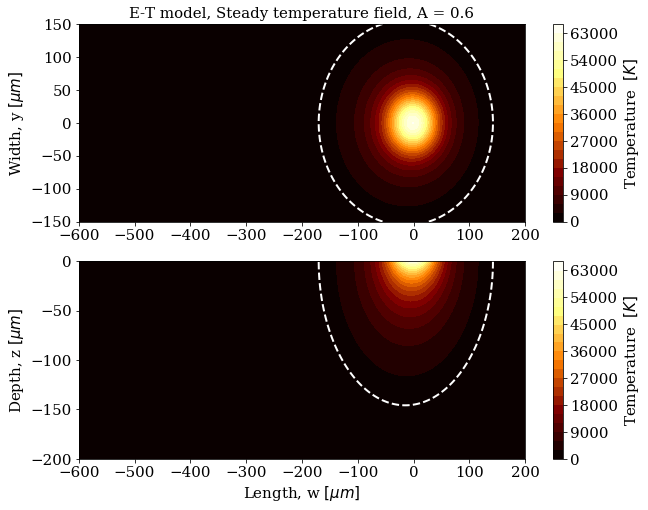

In [17]:
contour_plots (TfXY, TfXZ, w, y, z, Tmelt, melt_dimens, 15)

In [ ]:
y = numpy.linspace(-150e-6,150e-6,450) 
TfXY,TfXZ,ErXY,ErXZ =  Tfield(w,y,z, mater_bed, 5, 0.65, radius = 25e-6, Tambient = 300, t = 1e-3)
TfXYm,TfXZm,ErXYm,ErXZm = Tfield(w,y,z, mater_bed, 75, 0.01875 , radius = 25e-6, Tambient = 300, t = 1e-3)

In [ ]:
melt_dimens = meltdim( TfXYm, TfXZm, w, y, z, Tmelt,  tol = 1.0 )

In [ ]:
contour_plots (TfXYm, TfXZm, w, y, z, Tmelt, melt_dimens, 15)

In [ ]:
points = 450
w = numpy.linspace ( -600e-06, 100e-06, points )
y = numpy.linspace ( 0, 200e-06, points )
z = numpy.linspace(0, -150e-6, points)

In [ ]:
TfXYl,TfXZl,ErXYl,ErXZl= Tfield(w,y,z, mater_bed, 5, 0.65, radius = 25e-6, Tambient = 300, t = 1e-3)
#TfXYm,TfXZm,ErXYm,ErXZm= Tfield(w,y,z, mater_bed, 15, 0.35, radius = 25e-6, Tambient = 300, t = 1e-3)
TfXYh,TfXZh,ErXYh,ErXZh= Tfield(w,y,z, mater_bed, 25, 0.2, radius = 25e-6, Tambient = 300, t = 1e-3)
numpy.save('MinCaseTXY',TfXYl)
numpy.save('MinCaseTXZ',TfXZl)
numpy.save('MaxCaseTXY',TfXYh)
numpy.save('MaxCaseTXZ',TfXZh)

In [ ]:
melt_dimens = meltdim( TfXYl, TfXZl, w, y, z, Tmelt,  tol = 4.0 )
melt_dimens

In [ ]:
import numpy
TfXYl,TfXZl = numpy.load('MinCaseTXY.npy'), numpy.load('MinCaseTXZ.npy')
TfXYh,TfXZh = numpy.load('MaxCaseTXY.npy'), numpy.load('MaxCaseTXZ.npy')

In [ ]:
fig, (ax1, ax2) = pyplot.subplots(2,1, figsize=(10,10), dpi=300)
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 15
mapcolor = cm.plasma
xgridXZ, ygridXZ = numpy.meshgrid ( w, z )
xgridXZ = xgridXZ * (10**6) ; ygridXZ = ygridXZ * (10**6) ;
levels = numpy.array([300,800,1000,1500,2000,2500,3000,3500,4000,4500, 5000, 5500, 6000, 6500, 7000, 7500])/1e3
#levels = numpy.array([300,500,800,1000,2000,3000,4000, 5000,  6000, 7000, 7500])/1e3
low = ax1.contourf ( xgridXZ, ygridXZ, TfXZl/1e3, levels = levels, cmap = mapcolor )
ax1.contour(xgridXZ, ygridXZ, TfXZl/1e3 ,[Tmelt/1e3], colors = ( 'crimson' ),linewidths=(1),linestyles='--')
ax1.set( ylabel='Depth ($\mu m$)')
#ax1.set_title('$P = 5 \ W, V = 650 \ mms^{-1}$')
tickvalues = [0.3,0.8,1,1.5,2,2.5,3,3.5,4,4.5,5.0,5.5,6.0,6.5,7.0,7.5]
#tickvalues = [0.3,0.5,0.8,1,2,3,4,5.0,6.0,7, 7.5]
lowbar = fig.colorbar(low, ax=ax1, pad = 0.01, ticks = tickvalues )
#lowbar.formatter.set_powerlimits((0,4))
lowbar.ax.set_yticklabels(['0.30','0.80','1.0','1.5','2.0','2.5','3.0','3.5','4.0','4.5','5.0','5.5','6.0','6.5','7.0','7.5'])
#lowbar.ax.set_yticklabels(['0.30','0.80','1.0','2.0','3.0','4.0','5.0','6.0','7.0', '7.5'])
#lowbar.ax.set_title('T ($K$)')
lowbar.set_label(r'Temperature $\times 10^{3}$ ($K$)')

# middle = ax2.contourf ( xgridXZ, ygridXZ, TfXZm, levels = 25, cmap = mapcolor )
# ax2.contour(xgridXZ, ygridXZ, TfXZm ,[ Tmelt ], colors = ( 'white' ),linewidths=(2),linestyles='--')
# ax2.set_title('$P = 15 \ W, V = 350 \ ms^{-1}$')
# ax2.set(xlabel='$Length,\ w \ [\mu m]$')
# middlebar = fig.colorbar(middle, ax=ax2)
# #middlebar.set_label('Temperature  $ [K] $')
#levels = numpy.array([300, 500, 800, 1000, 5000, 10000, 15000, 20000, 25000,30000,35000, 40000, 45000, 50000, 55000 ])/1e3
levels = 21
high = ax2.contourf( xgridXZ, ygridXZ, TfXZh/1e3, levels = levels, cmap = mapcolor )
ax2.contour(xgridXZ, ygridXZ, TfXZh/1e3 ,[ Tmelt/1e3 ], colors = ( 'crimson' ),linewidths=(1),linestyles='--')
#ax2.set_title('$P = 25 \ W, V = 200 \ mms^{-1}$')
ax2.set(xlabel='Length ($\mu m$)', ylabel='Depth ($\mu m$)')
tickvalues = [1.0,5.0,10,15,20,25,30,35,40,45,50,55]
#tickvalues = [0.3,1.0,5.0,10,20,30,40,50,55]
highbar= fig.colorbar(high, ax=ax2, pad = 0.01, ticks=tickvalues)
highbar.set_label(r'Temperature $\times 10^{3}$ ($K$)')
highbar.ax.set_yticklabels([  '1.0','5.0', '10','15','20','25','30','35','40','45','50','55'])
#highbar.ax.set_yticklabels(['0.30','1.0', '5.0', '10','20','30','40','50','55'])
#highbar.formatter.set_powerlimits((0,4))
#highbar.update_ticks()
#pyplot.subplots_adjust(wspace=0.4)

pyplot.tight_layout()


ax1.text(160,-145, "(a)", fontweight="bold", color='white')
ax2.text(160,-145 , "(b)", fontweight="bold", color='white')

ax1.set_ylim(-150,0)
ax2.set_ylim(-150,0)

ax1.set_xticklabels([])

ax1.annotate("", xy=(-540, -140), xycoords='data',  xytext=(-590, -140), textcoords='data',
            arrowprops=dict(arrowstyle="-|>",
                             connectionstyle="arc3", color='white',
                             lw=2.5,
                             ls='-'),)
ax2.annotate("", xy=(-540, -140), xycoords='data',  xytext=(-590, -140), textcoords='data',
            arrowprops=dict(arrowstyle="-|>",
                             connectionstyle="arc3", color='white',
                             lw=2.5,
                             ls='-'),)

#pyplot.savefig('extremepointsSF.png')
pyplot.show()